### Chap 1.4.10 Histograms in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##### 1. Histogram Calculation in OpenCV

In [30]:
img = cv2.imread('Everest.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [31]:
hist.shape

(256, 1)

In [32]:
print(hist)

[[8.000e+00]
 [3.000e+00]
 [2.000e+00]
 [3.000e+00]
 [5.000e+00]
 [3.000e+00]
 [6.000e+00]
 [6.000e+00]
 [4.000e+00]
 [6.000e+00]
 [7.000e+00]
 [9.000e+00]
 [1.500e+01]
 [9.000e+00]
 [1.100e+01]
 [1.700e+01]
 [1.400e+01]
 [2.000e+01]
 [1.600e+01]
 [2.300e+01]
 [2.900e+01]
 [3.600e+01]
 [4.100e+01]
 [5.000e+01]
 [4.300e+01]
 [6.900e+01]
 [6.900e+01]
 [8.200e+01]
 [7.200e+01]
 [9.700e+01]
 [1.330e+02]
 [1.160e+02]
 [1.310e+02]
 [1.750e+02]
 [3.180e+02]
 [5.560e+02]
 [9.550e+02]
 [1.323e+03]
 [1.979e+03]
 [2.769e+03]
 [3.982e+03]
 [5.116e+03]
 [5.221e+03]
 [5.382e+03]
 [5.174e+03]
 [5.282e+03]
 [5.189e+03]
 [5.021e+03]
 [4.830e+03]
 [4.170e+03]
 [3.631e+03]
 [3.340e+03]
 [3.179e+03]
 [2.933e+03]
 [3.021e+03]
 [3.409e+03]
 [3.853e+03]
 [4.609e+03]
 [4.933e+03]
 [4.465e+03]
 [4.139e+03]
 [3.676e+03]
 [3.233e+03]
 [2.958e+03]
 [2.831e+03]
 [2.681e+03]
 [2.510e+03]
 [2.449e+03]
 [2.378e+03]
 [2.445e+03]
 [2.473e+03]
 [2.243e+03]
 [2.032e+03]
 [1.920e+03]
 [1.812e+03]
 [1.743e+03]
 [1.658e+03]

##### 2. Histogram Calculation in Numpy

In [33]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [34]:
print(hist)

[   8    3    2    3    5    3    6    6    4    6    7    9   15    9
   11   17   14   20   16   23   29   36   41   50   43   69   69   82
   72   97  133  116  131  175  318  556  955 1323 1979 2769 3982 5116
 5221 5382 5174 5282 5189 5021 4830 4170 3631 3340 3179 2933 3021 3409
 3853 4609 4933 4465 4139 3676 3233 2958 2831 2681 2510 2449 2378 2445
 2473 2243 2032 1920 1812 1743 1658 1612 1587 1490 1357 1418 1380 1356
 1450 1385 1478 1403 1373 1355 1336 1414 1226 1256 1273 1286 1263 1258
 1252 1178 1107 1232 1141 1188 1165 1131 1093 1049 1065 1064 1090 1022
 1056 1035  972  967  968  980  994 1009 1050 1004 1035  987  901 1024
  973  928 1019  903  867  910  870  822  893  902  924  937 1010  940
  906  861  775  804  734  720  720  764  769  799  782  772  788  788
  771  799  797  833  840  840  843  827  848  795  857  800  872  857
  822  916  874  880  863  882  897  972  938  929  983  945  948  994
  911 1055 1008 1041  927 1031  981 1028 1021 1020 1098 1102 1028 1132
 1147 

#### Plotting Histograms

##### 1. Using Matplotlib

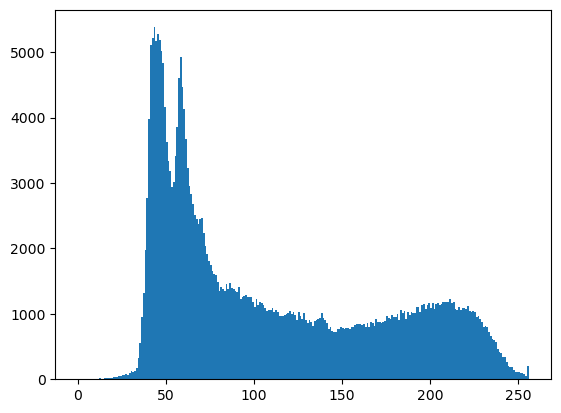

In [35]:
img = cv2.imread('Everest.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

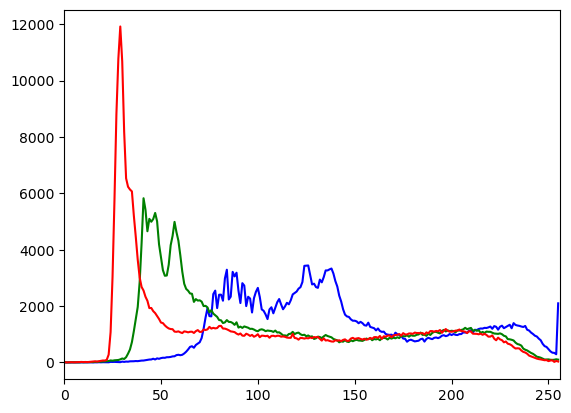

In [39]:
img = cv2.imread('Everest.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
   histr = cv2.calcHist([img],[i],None,[256],[0,256])
   plt.plot(histr,color = col)
   plt.xlim([0,256])

plt.show()

##### 2. Using OpenCV

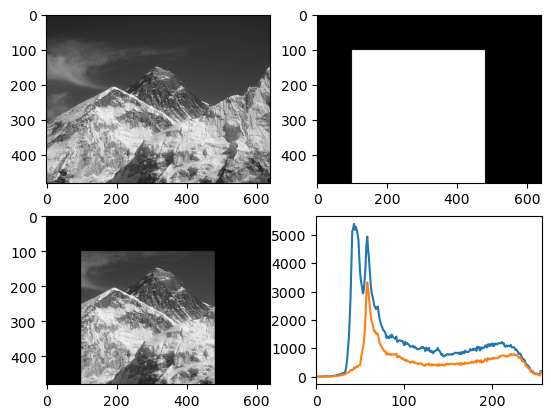

In [42]:
img = cv2.imread('Everest.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:640, 100:480] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#### Histograms- 2: Histogram Equalizatio

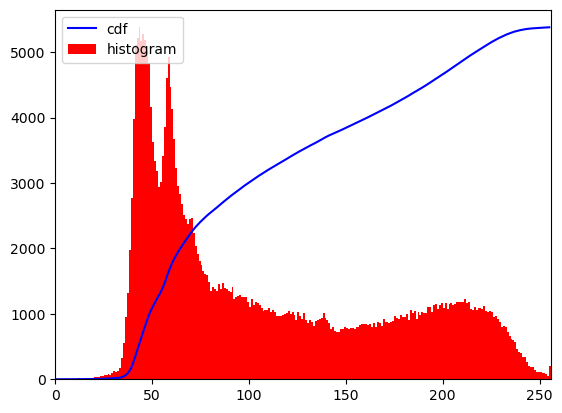

In [62]:
img = cv2.imread('Everest.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [63]:
# 직선형태로
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [64]:
img2 = cdf[img]

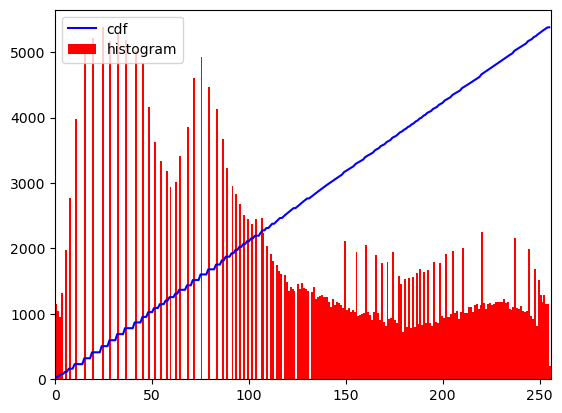

In [65]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

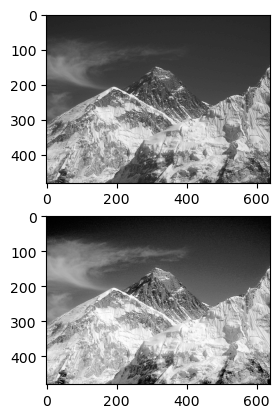

In [66]:
plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')
plt.show()

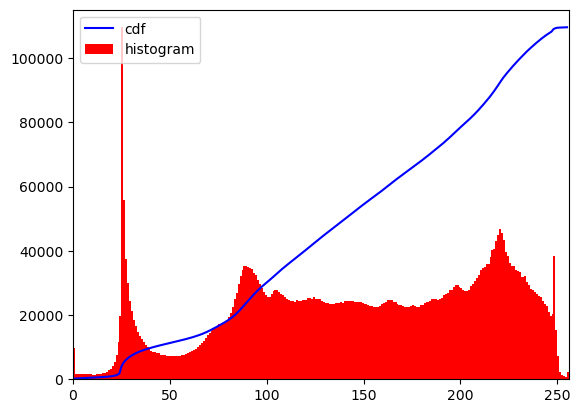

In [67]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [68]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

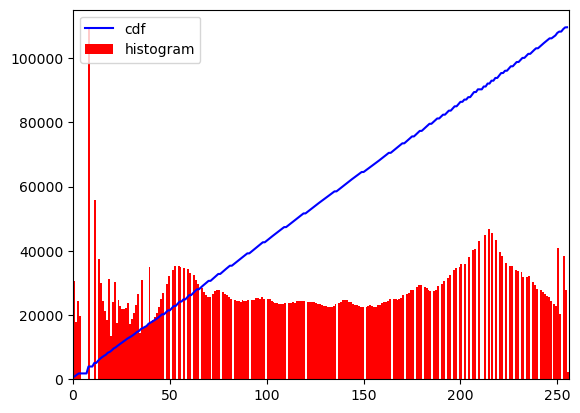

In [69]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

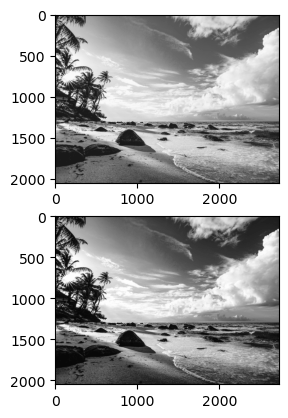

In [70]:
plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')
plt.show()